<a href="https://colab.research.google.com/github/ggume/forgrad/blob/main/for_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

dataset = pd.read_csv('../heart_failure_clinical_records_dataset.csv')

age                         0.099038
anaemia                     0.024785
creatinine_phosphokinase    0.076268
diabetes                    0.031286
ejection_fraction           0.134256
high_blood_pressure         0.028022
platelets                   0.074089
serum_creatinine            0.121726
serum_sodium                0.081954
sex                         0.027011
smoking                     0.027693
time                        0.273871
dtype: float64


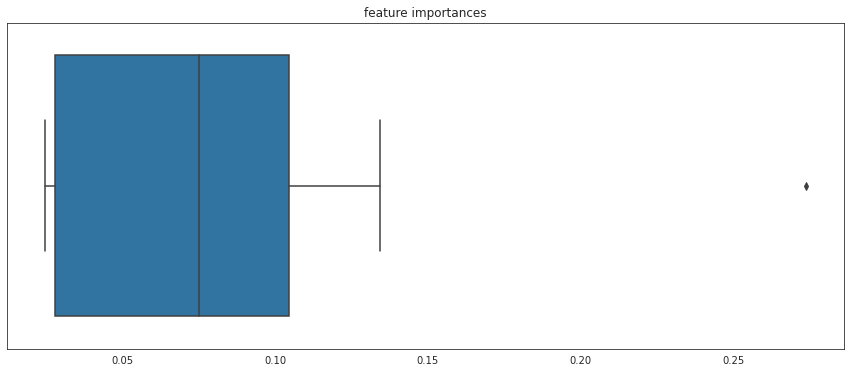

In [49]:
# 특징요소 추출
plt.rcParams['figure.figsize']=15,6 
sns.set_style("white")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

#feature 중요도 확인
#print(model.feature_importances_)

'''
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)
'''

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#feat_importances.nlargest(12).plot(kind='barh')
sns.boxplot(x=feat_importances)

#출력
print(feat_importances)
plt.title("feature importances")
plt.show()

In [37]:
# We will select only 4 features : age, time, ejection_fraction, serum_creatinine

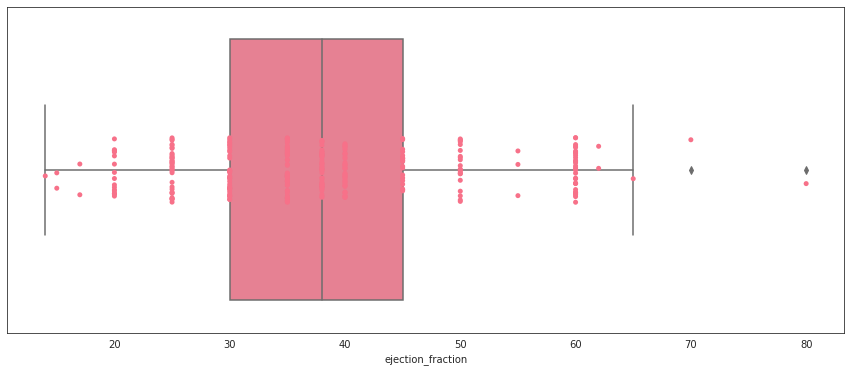

In [21]:
# Boxplot for ejection_fraction
sns.boxplot(x=dataset.ejection_fraction, palette="husl")
sns.stripplot(x=dataset.ejection_fraction, jitter=True, palette="husl")
plt.show()

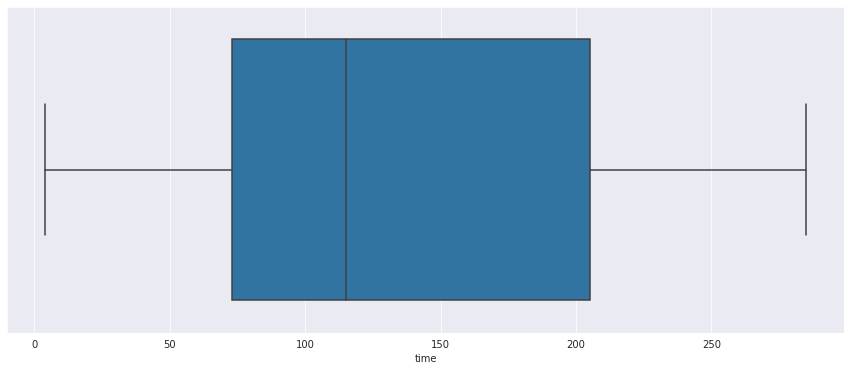

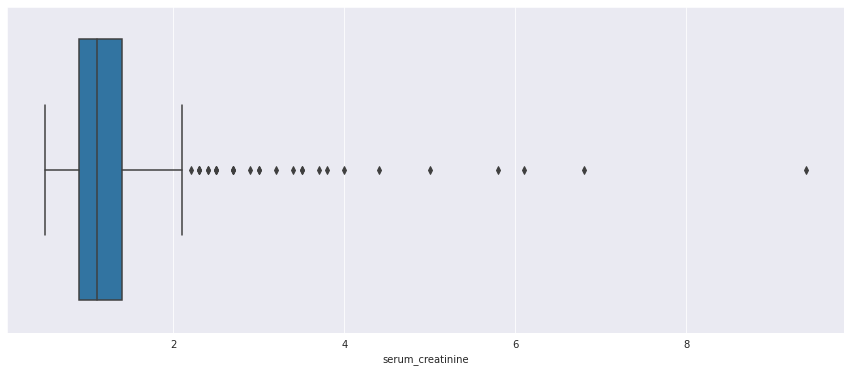

In [7]:
dataset[dataset['ejection_fraction']>=70]
dataset = dataset[dataset['ejection_fraction']<70]

sns.boxplot(x=dataset.time)
plt.show()

sns.boxplot(x=dataset.serum_creatinine)
plt.show()

In [8]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( 
        start=40,
        end=95,
        size=2
    ),
    marker_color='darkblue',
    opacity=1
))

fig.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='Count', 
    bargap=0.05, 
    plot_bgcolor='#ffffff',
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [9]:
# DEATH_EVENT에 대하여 age 분류

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()


In [10]:
# ejection_fraction의 분포

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( 
        start=14,
        end=80,
        size=2
    ),
    marker_color='darkblue',
    opacity=1
))

fig.update_layout(
    title_text='Ejection Fraction Distribution',
    xaxis_title_text='Ejection Fraction',
    yaxis_title_text='Count', 
    bargap=0.05, 
    plot_bgcolor='#ffffff',
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()


In [11]:
# DEATH_EVENT에 대하여 ejection_fraction 분류

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()


In [12]:
# serum_creatinine의 분포

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( 
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='darkblue',
    opacity=1
))

fig.update_layout(
    title_text='Serum Creatinine Distribution',
    xaxis_title_text='Serum Creatinine',
    yaxis_title_text='Count', 
    bargap=0.05, 
    plot_bgcolor='#ffffff',
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [ ]:
# DEATH_EVENT에 대한 serum_creatinine 분류

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns)
fig.show()
